# Predicting the sales price of Bulldozers using Machine Learning

## 1.Problem Definition
> predicting the sale price of bulldozers sold at auctions.

## 2.Data

The data is downloaded from Kaggle Bluebook for Bulldozers 
competition:https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evalutaion
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note:** The goal for most regression evaluation metrices is to minimize the error(In our case minimize RMSLE).

## 4.Features
Data Dictionary that provides all the features of the dataset 
can be viewed here:https://docs.google.com/spreadsheets/d/1-IT0MqdZEcshsa2vyDETJGW4_FgBZIkMsltQ3H2jTi0/edit#gid=0

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# importing training and validation datasets
data = pd.read_csv("data/TrainAndValid.csv", low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

[Text(0.5, 0, 'Sale Price')]

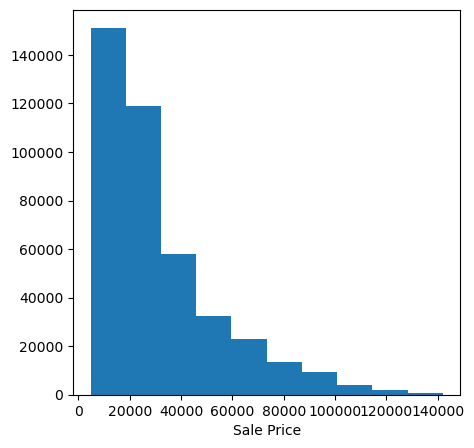

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(data["SalePrice"]);
ax.set(xlabel="Sale Price")

In [5]:
data["saledate"][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

### Parsing Dates

In [6]:
data = pd.read_csv("data/TrainAndValid.csv", parse_dates=["saledate"], low_memory=False)
data["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [7]:
data["saledate"][:10], data["SalePrice"][:10]

(0   2006-11-16
 1   2004-03-26
 2   2004-02-26
 3   2011-05-19
 4   2009-07-23
 5   2008-12-18
 6   2004-08-26
 7   2005-11-17
 8   2009-08-27
 9   2007-08-09
 Name: saledate, dtype: datetime64[ns],
 0    66000.0
 1    57000.0
 2    10000.0
 3    38500.0
 4    11000.0
 5    26500.0
 6    21000.0
 7    27000.0
 8    21500.0
 9    65000.0
 Name: SalePrice, dtype: float64)

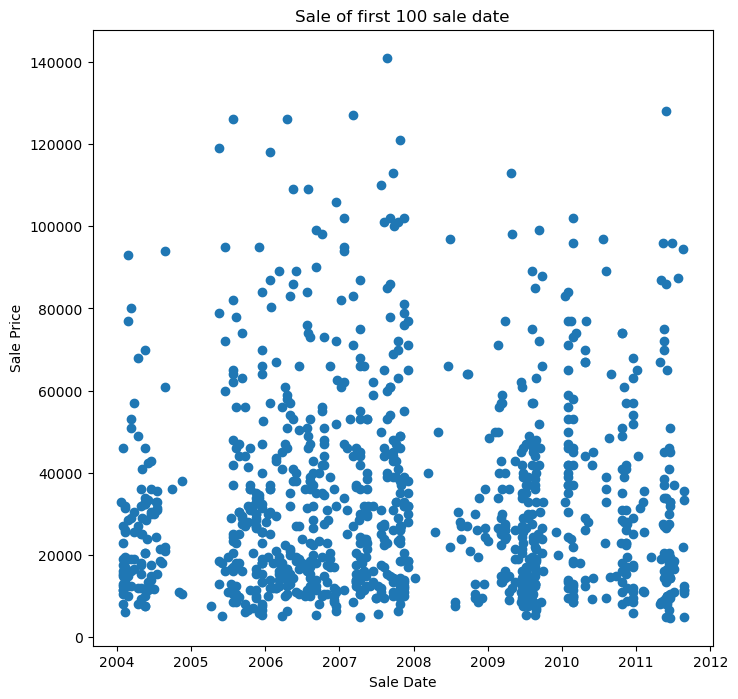

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(data["saledate"][:1000], data["SalePrice"][:1000])
ax.set(title='Sale of first 100 sale date', xlabel="Sale Date", ylabel="Sale Price");

In [9]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
data["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

### Sort Dataframe by saleDate


In [12]:
data.sort_values(by=["saledate"], ascending=True, inplace=True)
data["saledate"].iloc[:10]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [13]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Make a copy of the original dataset

In [14]:
df = data.copy()
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


# Dividing `saledate` into:
    * Day
    * Month 
    * Year
    * DayofWeek
    * DayofMonth

In [15]:
df['saleDay'] = df["saledate"].dt.day
df['saleMonth'] = df["saledate"].dt.month
df['saleYear'] = df["saledate"].dt.year
df['saleDayofWeek'] = df["saledate"].dt.dayofweek
df['saleDayofMonth'] = df["saledate"].dt.dayofyear
df.drop('saledate', axis=1, inplace=True)
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [16]:
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# 5.Modelling



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Converting String Objects

In [18]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [19]:
df.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [20]:
df.isna().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Filling Missing data(numeric)


In [21]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Adding a coloumn which tells that data was missing or not
            df[label + "is missing"] = pd.isnull(content)
            # Filling missing values
            df[label] = content.fillna(content.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   SalesID                             412698 non-null  int64   
 1   SalePrice                           412698 non-null  float64 
 2   MachineID                           412698 non-null  int64   
 3   ModelID                             412698 non-null  int64   
 4   datasource                          412698 non-null  int64   
 5   auctioneerID                        412698 non-null  float64 
 6   YearMade                            412698 non-null  int64   
 7   MachineHoursCurrentMeter            412698 non-null  float64 
 8   UsageBand                           73670 non-null   category
 9   fiModelDesc                         412698 non-null  category
 10  fiBaseModel                         412698 non-null  category
 11  fiSecond

In [22]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleDay,saleMonth,saleYear,saleDayofWeek,saleDayofMonth,auctioneerIDis missing,MachineHoursCurrentMeteris missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,17,1,1989,1,17,False,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,31,1,1989,1,31,False,True
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,31,1,1989,1,31,False,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,31,1,1989,1,31,False,True
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,31,1,1989,1,31,False,True


### Filling missing data(Catagorical)

In [23]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding a column to indicate whether data had missing values
        df[label + "is missing"] = pd.isnull(content)
        # Turn Catagories into numbers 
        df[label] = pd.Categorical(content).codes + 1
df.isna().sum()     

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis missing     0
Blade_Typeis missing           0
Travel_Controlsis missing      0
Differential_Typeis missing    0
Steering_Controlsis missing    0
Length: 103, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [25]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis missing,False,True,False,True,False
Blade_Typeis missing,False,True,False,True,False
Travel_Controlsis missing,False,True,False,True,False
Differential_Typeis missing,True,False,True,False,True


In [26]:
len(df)

412698

In [27]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis missing,Stick_Lengthis missing,Thumbis missing,Pattern_Changeris missing,Grouser_Typeis missing,Backhoe_Mountingis missing,Blade_Typeis missing,Travel_Controlsis missing,Differential_Typeis missing,Steering_Controlsis missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


### Splitting data into train and validation set
> Kaggle discription specifies the date of training and validation datasets.
 for more info check out:-https://www.kaggle.com/c/bluebook-for-bulldozers/data


In [28]:
# Training set
df_train = df[df.saleYear != 2012]

# Validation set
df_val = df[df.saleYear == 2012]

len(df_train), len(df_val)

(401125, 11573)

In [39]:
# Split data into x and y
x_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]

x_val, y_val = df_val.drop("SalePrice", axis = 1), df_val["SalePrice"]

x_train.shape, y_train.shape,  x_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an Evaluation function

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

# Function for RMSLE
def RMSLE(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Function for other evaluations
def evaluation(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
              "Validation MAE" : mean_absolute_error(y_val, val_preds),
              "Training R2" : r2_score(y_train, train_preds),
              "Validation R2" : r2_score(y_val, val_preds),
              "Training RMSLE" : RMSLE(y_train, train_preds),
              "Validation RMSLE" : RMSLE(y_val, val_preds)
             }
    return scores

## Fitting & evaluating our model  

In [58]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_jobs = -1,
                             max_samples = 10000,
                             random_state=42)

In [59]:
%%time
model.fit(x_train, y_train)


CPU times: total: 27.5 s
Wall time: 7.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [60]:
evaluation(model)

{'Training MAE': 5560.196994802119,
 'Validation MAE': 7149.5038546617125,
 'Training R2': 0.860739839617666,
 'Validation R2': 0.8332181632267017,
 'Training RMSLE': 0.25778619742858433,
 'Validation RMSLE': 0.29225959234082205}

## Tunning HyperParameters

In [71]:
# Creating grid for hperparameters


rf_grid = {"n_estimators" : np.arange(10,100,10),
          "max_depth" : [None, 3, 5 ,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2),
          "max_features" : [0.5, 1, 'sqrt'],
          "max_samples" : [10000]
          }

###  Finding the best HyperParameters

In [82]:
%%time

from sklearn.model_selection import RandomizedSearchCV


rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state=42),
                         param_distributions = rf_grid,
                         n_iter = 200,
                         cv = 5,
                         verbose = True)

rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 13min 15s
Wall time: 31min 1s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=200,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [83]:
rf_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [84]:
evaluation(rf_model)

{'Training MAE': 5918.117666099741,
 'Validation MAE': 7288.885600459202,
 'Training R2': 0.8446544602957651,
 'Validation R2': 0.8325760000044675,
 'Training RMSLE': 0.2703548662797943,
 'Validation RMSLE': 0.29918017063535995}

## Applying the best HyperParameters to whole dataset

In [85]:
from sklearn.ensemble import RandomForestRegressor


new_model = RandomForestRegressor(n_jobs = -1,
                                  n_estimators = 40,
                                  min_samples_split = 10,
                                  min_samples_leaf = 1,
                                  max_features = 0.5,
                                  max_depth = None,
                                  max_samples = None,
                                  random_state=42)
new_model.fit(x_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=10, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [86]:
evaluation(new_model)

{'Training MAE': 2608.8310882124115,
 'Validation MAE': 5958.015580457992,
 'Training R2': 0.9673350288413772,
 'Validation R2': 0.8810654597869477,
 'Training RMSLE': 0.13019647086036631,
 'Validation RMSLE': 0.24733330262306902}

In [91]:
df_test = pd.read_csv("data/Test.csv", low_memory = False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [93]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [98]:
len(df.columns), len(df_test.columns)

(103, 52)

# Preprocessing the data
Getting test dataset in the same order as train&validation dataset

In [108]:
def preprocess_data(df_test):
    df_test['saleDay'] = df_test["saledate"].dt.day
    df_test['saleMonth'] = df_test["saledate"].dt.month
    df_test['saleYear'] = df_test["saledate"].dt.year
    df_test['saleDayofWeek'] = df_test["saledate"].dt.dayofweek
    df_test['saleDayofMonth'] = df_test["saledate"].dt.dayofyear
    df_test.drop('saledate', axis=1, inplace=True)
    
    # Filling missing values
    for label, content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label + "is missing"] = pd.isnull(content)
                df_test[label] = content.fillna(content.median())
    
    # Converting objects into catagorical data
    for label, content in df_test.items():
        if pd.api.types.is_string_dtype(content):
            df_test[label] = content.astype("category").cat.as_ordered() 
    
    # turn Catagorical data into numeric form
    for label, content in df_test.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label + "is missing"] = pd.isnull(content)
            df_test[label] = pd.Categorical(content).codes + 1
    
    return df_test

In [109]:
df_test = preprocess_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controlsis missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [110]:
len(df.columns), len(df_test.columns)

(103, 101)

In [111]:
df_test.isna().sum()

SalesID                        0
MachineID                      0
ModelID                        0
datasource                     0
auctioneerID                   0
                              ..
Backhoe_Mountingis missing     0
Blade_Typeis missing           0
Travel_Controlsis missing      0
Differential_Typeis missing    0
Steering_Controlsis missing    0
Length: 101, dtype: int64

In [115]:
len(x_train.columns), len(df_test.columns)

(102, 101)

In [116]:
set(x_train.columns) - set(df_test.columns)

{'auctioneerIDis missing'}

### Adjusting df_test to have `auctioneerIDis missing`

In [117]:
df_test["auctioneerIDis missing"] = False
len(df_test.columns)

102

In [122]:
test_preds = new_model.predict(df_test)
test_preds

F:\ML_Project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([21282.29598588, 17522.78855528, 54338.02274115, ...,
       12925.82124683, 17749.88640526, 28585.01175929])

In [124]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis missing,Thumbis missing,Pattern_Changeris missing,Grouser_Typeis missing,Backhoe_Mountingis missing,Blade_Typeis missing,Travel_Controlsis missing,Differential_Typeis missing,Steering_Controlsis missing,auctioneerIDis missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


# Format Predictions into the format that Kaggle is after:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation 

In [126]:
dataframe = pd.DataFrame()
dataframe["SalesID"] = df_test["SalesID"]
dataframe["SalePrice"] = test_preds
dataframe

,SalesID,SalePrice
0,1227829,21282.295986
1,1227844,17522.788555
2,1227847,54338.022741
3,1227848,64599.358350
4,1227863,45521.720736
...,...,...
12452,6643171,42775.538595
12453,6643173,14745.323180
12454,6643184,12925.821247
12455,6643186,17749.886405


# Exporting prediction data

In [127]:
dataframe.to_csv("test_prediction.csv", index = False)

# Feature Inportance
Seeks to figure out which different attributes of data were most important

In [129]:
len(new_model.feature_importances_)

102

In [130]:
new_model.feature_importances_

array([3.25792373e-02, 2.14161927e-02, 4.54667431e-02, 1.94045431e-03,
       3.84995089e-03, 2.08079078e-01, 3.42477593e-03, 1.19646720e-03,
       4.28518221e-02, 4.71888942e-02, 5.72223168e-02, 4.42644718e-03,
       1.93122577e-02, 1.46549455e-01, 4.68706062e-02, 6.89341221e-03,
       2.24078329e-03, 2.37398500e-03, 4.29942230e-03, 5.60877197e-02,
       4.97582876e-04, 4.86863477e-05, 7.61327876e-04, 1.52441033e-04,
       1.11169781e-03, 2.30728982e-05, 2.60079461e-03, 4.52931944e-03,
       3.68850707e-04, 2.07691408e-03, 4.19394841e-03, 1.85272101e-03,
       3.66315291e-03, 1.01904559e-03, 7.09765551e-04, 5.45905413e-03,
       1.26574562e-03, 1.91588425e-02, 1.52539215e-03, 7.87455343e-04,
       9.34546908e-04, 1.13201881e-03, 1.18772075e-03, 6.74887282e-04,
       5.51276368e-04, 4.15122404e-04, 2.78004071e-04, 2.24155002e-03,
       9.56606551e-04, 2.95142047e-04, 2.80119679e-04, 6.73552384e-03,
       4.40896872e-03, 7.41084493e-02, 3.46023899e-03, 1.09243645e-02,
      

In [141]:
def plot_features(columns, importance,n=20):
    data_frame = (pd.DataFrame({"Features" : columns,
                                "Importance" : importance})
                 .sort_values("Importance", ascending = False)
                 .reset_index(drop = True))
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.barh(data_frame["Features"][:n], data_frame["Importance"][:n])
    ax.set(xlabel = "Features", ylabel = "Feature Importance")
    ax.invert_yaxis()

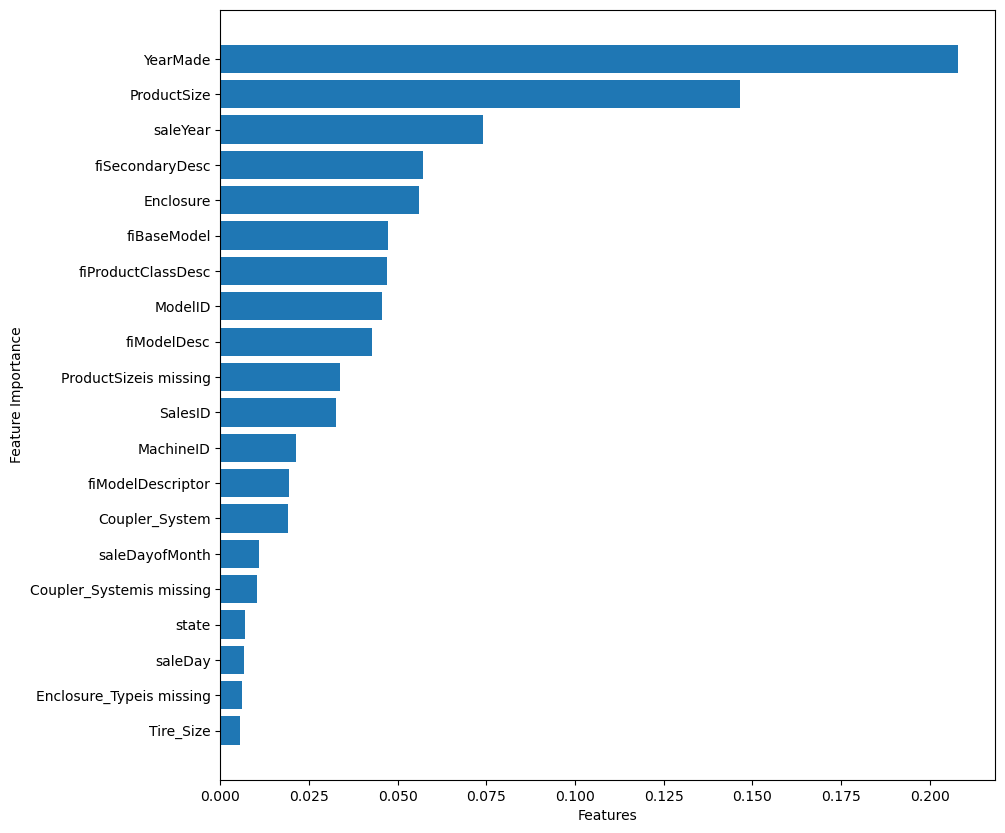

In [142]:
plot_features(x_train.columns, new_model.feature_importances_)

# Saving model

In [143]:
from joblib import dump, load
dump(new_model, filename="model/RandomForestModel.joblib")

['model/RandomForestModel.joblib']

In [147]:
load_model = load(filename="model/RandomForestModel.joblib")
load_model.feature_importances_

array([3.25792373e-02, 2.14161927e-02, 4.54667431e-02, 1.94045431e-03,
       3.84995089e-03, 2.08079078e-01, 3.42477593e-03, 1.19646720e-03,
       4.28518221e-02, 4.71888942e-02, 5.72223168e-02, 4.42644718e-03,
       1.93122577e-02, 1.46549455e-01, 4.68706062e-02, 6.89341221e-03,
       2.24078329e-03, 2.37398500e-03, 4.29942230e-03, 5.60877197e-02,
       4.97582876e-04, 4.86863477e-05, 7.61327876e-04, 1.52441033e-04,
       1.11169781e-03, 2.30728982e-05, 2.60079461e-03, 4.52931944e-03,
       3.68850707e-04, 2.07691408e-03, 4.19394841e-03, 1.85272101e-03,
       3.66315291e-03, 1.01904559e-03, 7.09765551e-04, 5.45905413e-03,
       1.26574562e-03, 1.91588425e-02, 1.52539215e-03, 7.87455343e-04,
       9.34546908e-04, 1.13201881e-03, 1.18772075e-03, 6.74887282e-04,
       5.51276368e-04, 4.15122404e-04, 2.78004071e-04, 2.24155002e-03,
       9.56606551e-04, 2.95142047e-04, 2.80119679e-04, 6.73552384e-03,
       4.40896872e-03, 7.41084493e-02, 3.46023899e-03, 1.09243645e-02,
      